In [34]:
# Install necessary libraries------------------------------
#!pip install pandas
!pip install --upgrade --user pandas numpy scikit-learn matplotlib tensorflow keras-tuner;

In [2]:
# Import necessary libraries------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import robust_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import AUC
from keras_tuner import Hyperband
from sklearn.metrics import make_scorer
import plotly.express as px
import plotly.graph_objects as go

C:\Users\anil0\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Set the seed for reproducibility------------------------------
np.random.seed(1)

# Load the data------------------------------
diabetes_data = pd.read_csv("diabetes.csv")

In [4]:
# Check Data------------------------------
diabetes_data.info()
diabetes_data['Outcome'] = diabetes_data['Outcome'].astype('category')
diabetes_data.info()

# Numerical summary------------------------------
print("\n **********Numerical Summary********** \n")
print(diabetes_data.describe())
diabetes_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies        

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age Outcome  
0                     0.627   50       1  
1                     0.351   31       0  
2                     0.672   32       1  
3                     0.167   21       0  
4                     2.288   33       1

From the above numerical summary of the diabetes dataset, we can deduce several insights:

<!--Missing Values-->
- No missing values observed in the dataset (768 entries for each variable).
<!--Outliers-->
- The substantial disparity observed between the 75th percentile and the maximum value suggests the presence of potential outliers, especially in features like 'Pregnancies,' 'Glucose,' 'BloodPressure,' 'SkinThickness,' 'Insulin,' 'BMI,' 'DiabetesPedigreeFunction,' and 'Age.'
<!--Data Distribution-->
<!--The mean values provide an indication of the central tendency of the data-->
- Features like 'Pregnancies' and 'Age' have low standard deviations, suggesting data points are close to the mean.
- Features like 'Insulin' and 'DiabetesPedigreeFunction' have higher standard deviations, indicating more variability.
<!--Zero Values-->
- Some features ('Glucose,' 'BloodPressure,' 'SkinThickness,' 'Insulin,' 'BMI,' 'DiabetesPedigreeFunction') contain zero values, this is notable when the minimum value is zero.
<!--Data Scaling-->
- Variability in feature scales, especially 'Insulin,' suggests the need for feature scaling before model training.
<!--Target Variable (Outcome)-->
- 'Outcome' is binary (0 or 1), indicating diabetes status.
- Approximately 35% of patients in the dataset have diabetes (mean of 'Outcome').
<!--Age Distribution-->
- 'Age' ranges from 21 to 81 years, with the majority falling between 24 and 41 years.

<!-- Next Steps
- Further explore feature relationships using boxplots and histograms.
- Handle zero values, consider feature scaling, and preprocess data for machine learning models.
- Train and evaluate machine learning models to predict diabetes.-->


 **********Visual Summary********** 



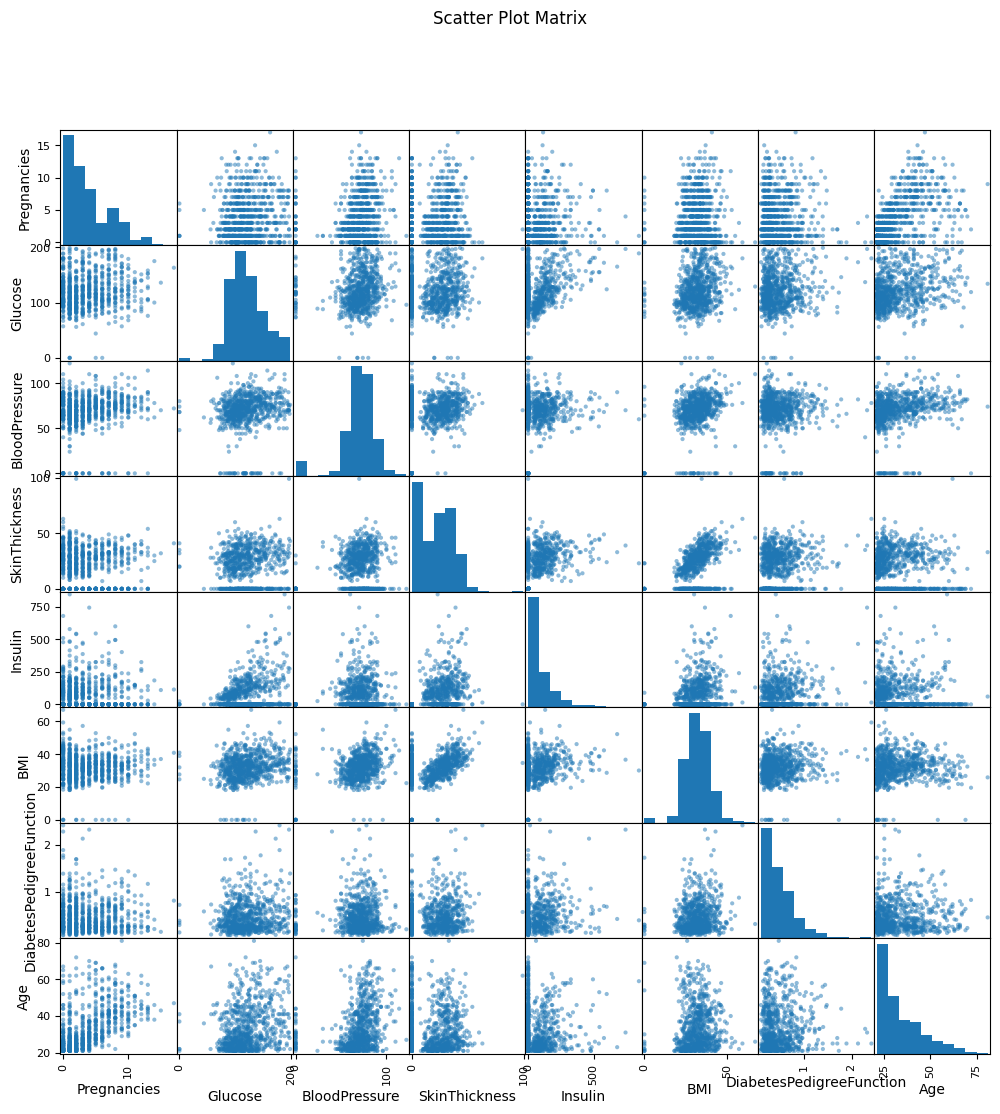

In [5]:
# Visual summary------------------------------
print("\n **********Visual Summary********** \n")
pd.plotting.scatter_matrix(diabetes_data, figsize=(12, 12))
plt.suptitle("Scatter Plot Matrix")
plt.show()

Scatter plots offer an intuitive way to assess patterns and trends in data. We note the following in our dataset:
<!--Relationship between continuous variables-->
- By examining the pattern of points in the subplots, we can infer that, for most variables, there are no strong correlation or trend between them.
<!--Correlation Assessment-->
<!--The clustering or dispersion of points on a scatter plot can provide insights into the strength and direction of the correlation between the two variables-->
- Visually we see a strong positive correlation between variables Insulin and Glucose, BMI and Skin Thickness.
<!--Outlier Detection-->
<!--Outliers, or data points that significantly deviate from the general pattern, are easily identifiable on scatter plots.-->
- There are multiple variables with potential outliers; further tests and evaluations will be necessary to confirm..
<!--Distribution of Data-->
<!--Scatter plots can reveal the distribution of data along both axes-->
- Patterns like clusters, gaps, or groupings in some variables hint at underlying structures or subpopulations. This insight prompts further exploration for a nuanced understanding of the data.
<!--Identifying Trends and Patterns-->
<!--Trends, patterns, and shapes in scatter plots can highlight underlying structures or relationships in the data-->
- For example, we see a linear trend between BMI and Skin Thickness and hence may suggest a linear relationship between the variables, while clusters mainly due to zero values may indicate distinct groups within the data.


 **********Box Plot********** 



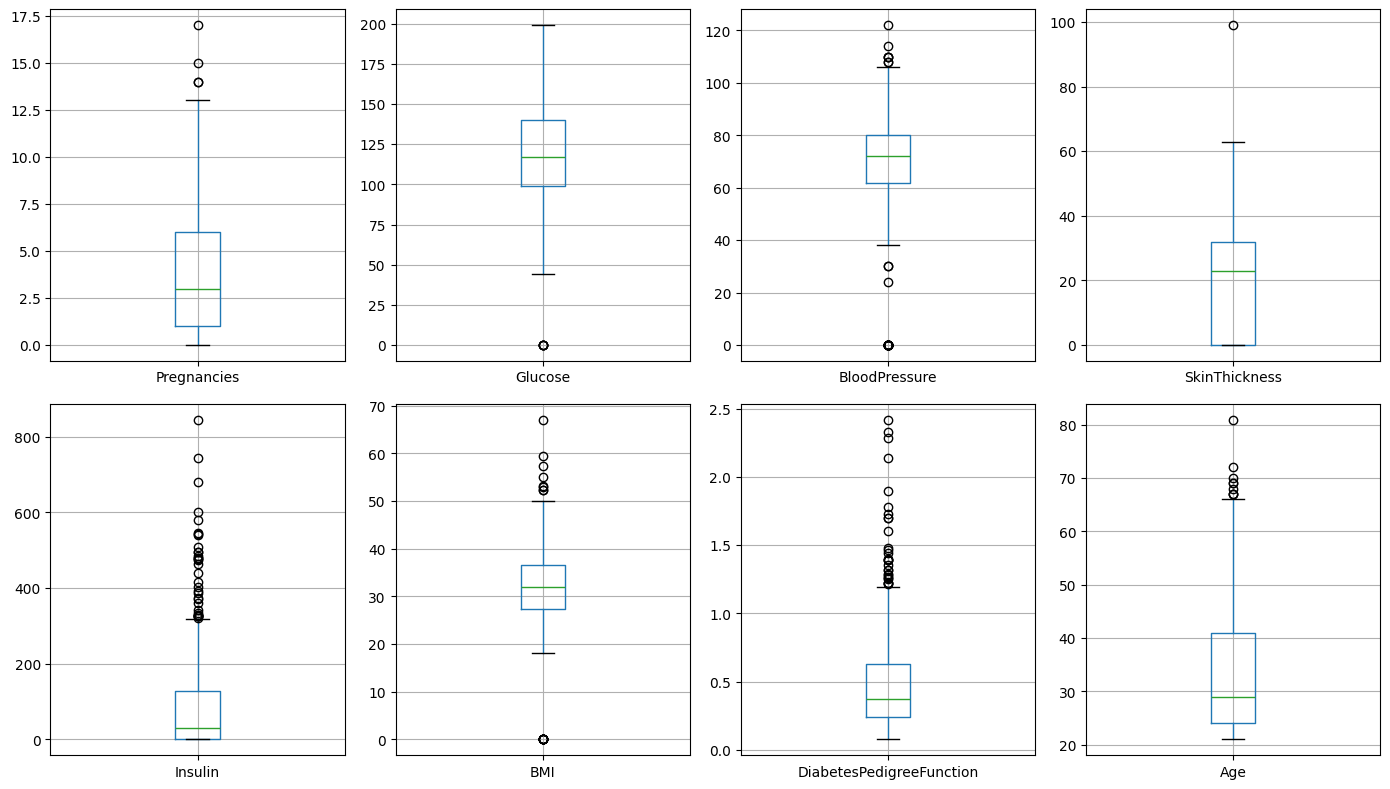

In [6]:
# Boxplots------------------------------
print("\n **********Box Plot********** \n")
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14, 8))
for i, col in enumerate(diabetes_data.columns[:-1]):
    diabetes_data.boxplot(column=col, ax=axes[i // 4, i % 4])
plt.tight_layout()
plt.show()

<!--Central Tendency-->
- For most features, the median indicates a roughly central tendency. However, in the case of Insulin, the median is notably lower compared to the overall range of data.
<!--Spread-->
- Glucose, Blood Pressure and BMI exhibit moderate spreads, indicating reasonable variability. On the other hand, Pregnancies, Skin Thickness, Diabetes Pedigree Function(DPF) and Age display relatively higher variability.
<!--Outliers-->
- Outliers are observed in all features. Notably, Insulin and DPF have a significant number of outliers, while Blood Pressure exhibits outliers on both ends.
<!--Skewness-->
- Many features exhibit some degree of skewness. Insulin, Age and DPF appear to be right-skewed, with medians closer to the lower end of the range and outliers on the upper end.
<!--Distribution-->
- The distributions are not perfectly symmetrical, and the presence of outliers suggests that some features may have heavy-tailed distributions.
<!---->
<!---->
<!---->
<!---->
<!---->

In [7]:
# Checking for near zero variance------------------------------
print("\n **********Near-Zero Variance Check********** \n")
#print(diabetes_data.apply(lambda x: np.var(x) < 1e-3))
print(diabetes_data.drop('Outcome', axis=1).apply(lambda x: np.var(x) < 1e-3))



 **********Near-Zero Variance Check********** 

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
dtype: bool


All features have sufficient variance; there are no concerns regarding near-zero variance.

In [8]:
# Checking for missing values------------------------------
print("\n **********Missing Value Check********** \n")
print(diabetes_data.isnull().sum())


 **********Missing Value Check********** 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Verifying the presence of missing values in each feature reinforces our earlier findings based on the numerical summary.


 **********Distribution Check********** 



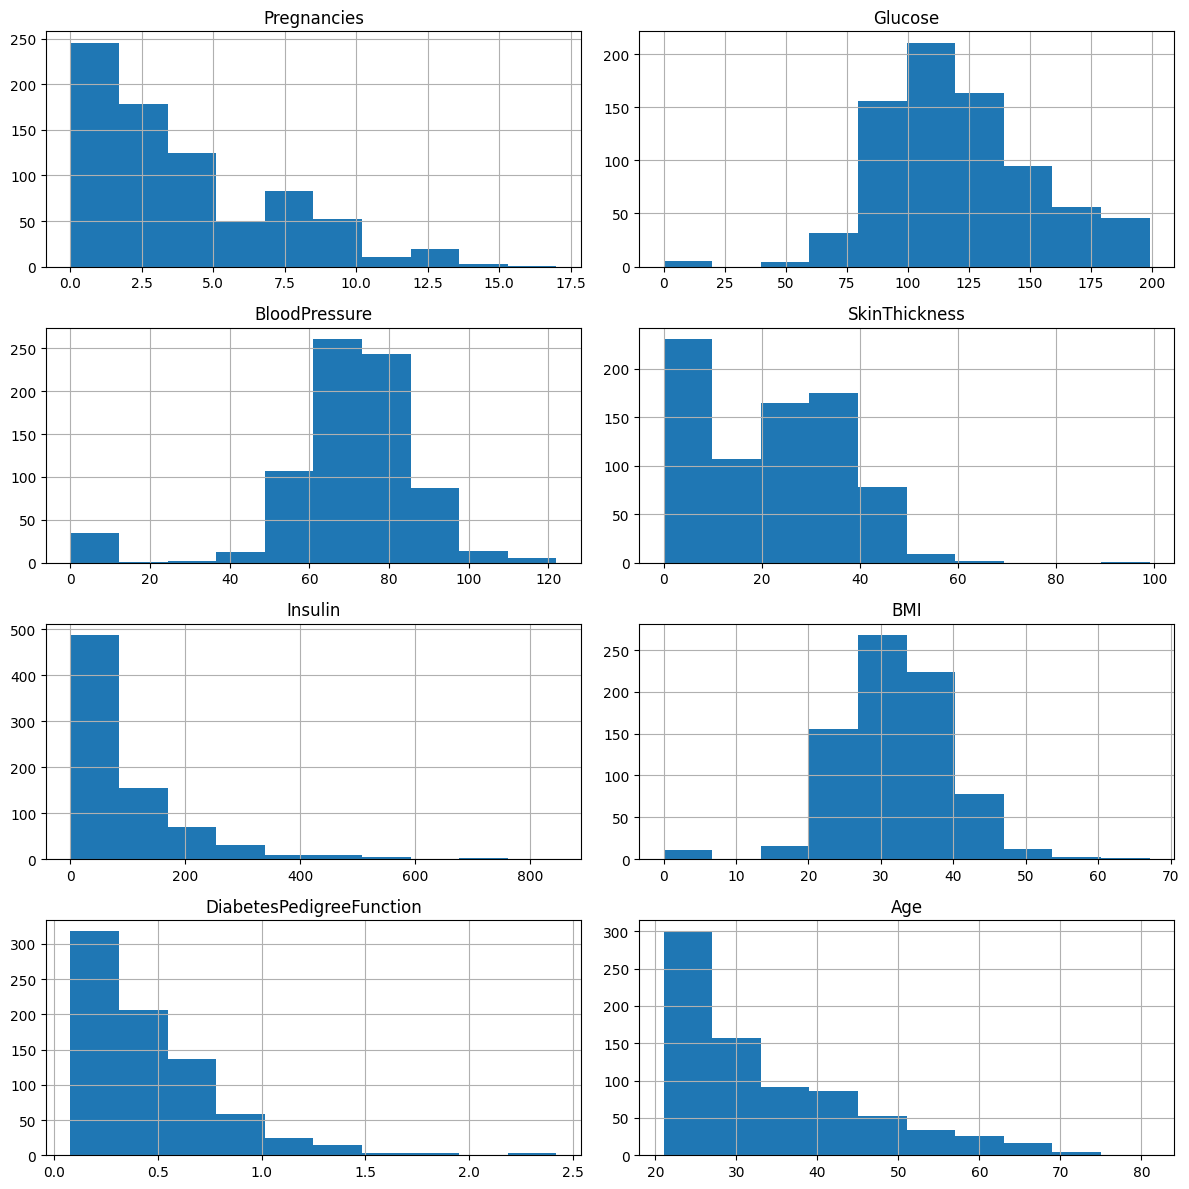

In [9]:
# Checking for distribution/center and skewness------------------------------
print("\n **********Distribution Check********** \n")
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))
for i, col in enumerate(diabetes_data.columns[:-1]):
    diabetes_data[col].hist(ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(col)
plt.tight_layout()

- The distributions of Glucose, Blood Pressure, and BMI appear to be centered around the middle of the data range, suggesting symmetrical distributions.
- Specifically, Glucose and Blood Pressure exhibit a slight rightward shift from the center, indicating a higher average level of glucose and blood pressure in the population, respectively.
- Conversely, the distributions of Pregnancies, Skin Thickness, Insulin, Diabetes Pedigree Function (DPF), and Age are right-skewed, as evidenced by the extended right tails in the histograms.
- Notably, Age displays a left-leaning center, suggesting a younger population.

For machine learning models, considering transformations to normalize the data or using models that can handle skewness would be beneficial.

In [10]:
# Checking for skewness------------------------------
print("\n **********Skewness Check********** \n")
print(diabetes_data.drop('Outcome', axis=1).apply(lambda x: x.skew()))


 **********Skewness Check********** 

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
dtype: float64


- Most health parameters exhibit positive skewness. This indicates that the majority of the population tends to have values below the average for each parameter. However, there is a notable minority with significantly higher levels for each parameter, particularly in the case of Insulin and DPF (Diabetes Pedigree Function).
- Negative skewness in Blood Pressure and BMI suggests a tendency toward higher values in the population for these two parameters.


 **********Correlation Check********** 



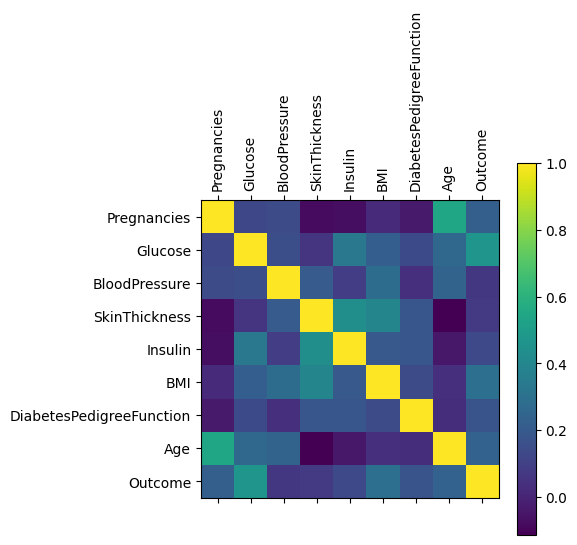

In [11]:
# Checking for correlated predictors------------------------------
print("\n **********Correlation Check********** \n")
corr_matrix = diabetes_data.corr()
plt.matshow(corr_matrix, cmap='viridis')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
plt.show()

- We observe a strong correlation between Age and the number of Pregnancies, as well as between Outcome and Glucose levels.
- Additionally, we can notice relatively moderate correlations between Insulin and Glucose, Insulin and Skin Thickness, as well as BMI and Skin Thickness.
- Fortunately, we do not identify any highly correlated features in our dataset that would require removal.


 **********Response Variable Check********** 



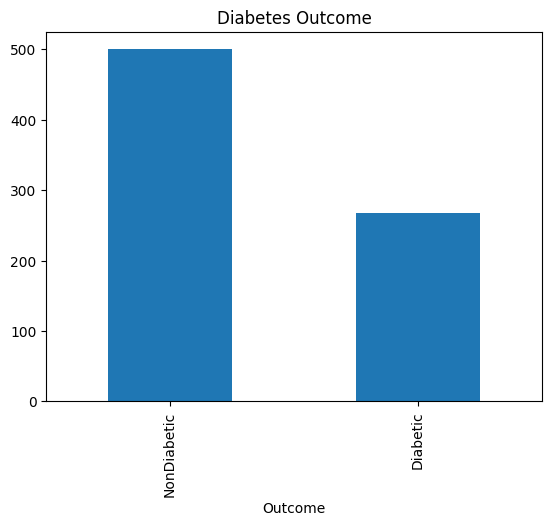

In [12]:
# Check if the distribution among the response variable classes is not vastly different------------------------------
print("\n **********Response Variable Check********** \n")
diabetes_data['Outcome'] = diabetes_data['Outcome'].map({0: 'NonDiabetic', 1: 'Diabetic'})
diabetes_data['Outcome'].value_counts().plot(kind='bar', title='Diabetes Outcome')
plt.show()

- There is a noticeable imbalance between the two classes, with non-diabetic outcomes being more prevalent than diabetic outcomes.
- When evaluating machine learning models using this data, metrics beyond accuracy, such as F1-score, precision or AUC-ROC, may be necessary to fully understand model performance given the class imbalance.

In [13]:
# Transform ------------------------------
# Use Yeo-Johnson transformation instead of Box-Cox due to presence of zeros in data------------------------------
transformer = ColumnTransformer(
    transformers=[
        ('yeojohnson', PowerTransformer(method='yeo-johnson'), diabetes_data.columns[:-1])
    ],
    remainder='passthrough'
)

# Apply the transformation
transformed_data = transformer.fit_transform(diabetes_data.drop('Outcome', axis=1))

# Create a new DataFrame with the transformed data
transformed_df = pd.DataFrame(transformed_data, columns=diabetes_data.columns[:-1])
transformed_df.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.813399  0.848665       0.068935       0.876707 -1.008294  0.174124   
1    -0.833906 -1.123027      -0.306484       0.632185 -1.008294 -0.725726   
2     1.188996  1.930906      -0.427244      -1.430072 -1.008294 -1.129341   
3    -0.833906 -0.996671      -0.306484       0.362347  0.859700 -0.537700   
4    -1.603317  0.506848      -1.693204       0.876707  1.077013  1.477376   

   DiabetesPedigreeFunction       Age  
0                  0.821764  1.364180  
1                 -0.168409  0.126452  
2                  0.935284  0.230161  
3                 -1.298725 -1.480075  
4                  2.336680  0.327328


 **********Skewness Check********** 

Pregnancies                -0.044644
Glucose                     0.122640
BloodPressure              -0.516806
SkinThickness              -0.458444
Insulin                     0.049581
BMI                         0.180839
DiabetesPedigreeFunction    0.142321
Age                         0.150219
dtype: float64


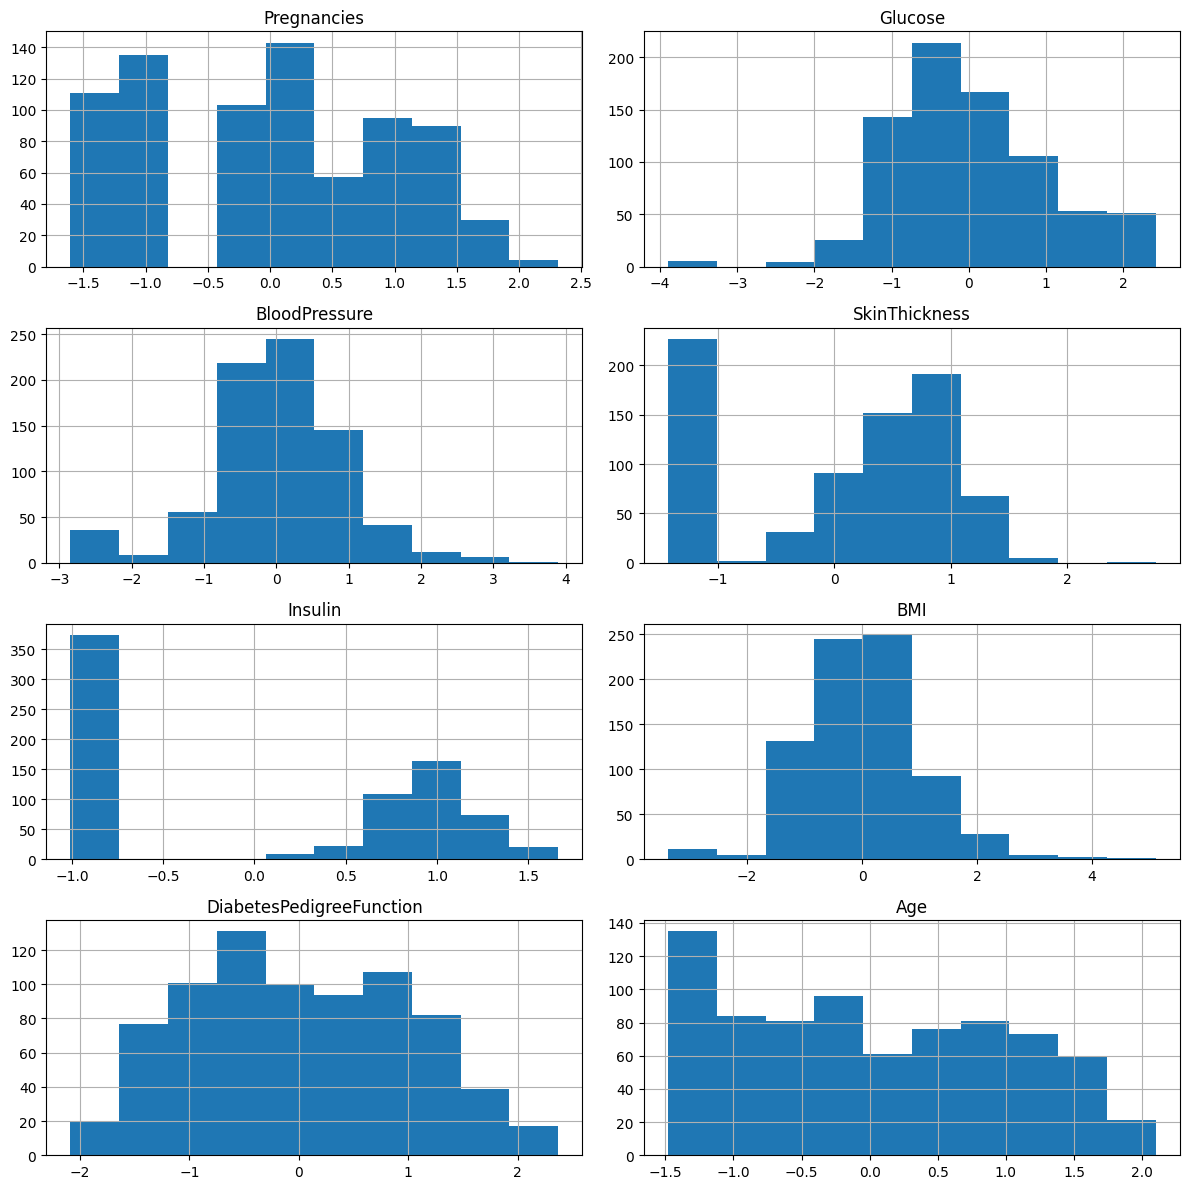

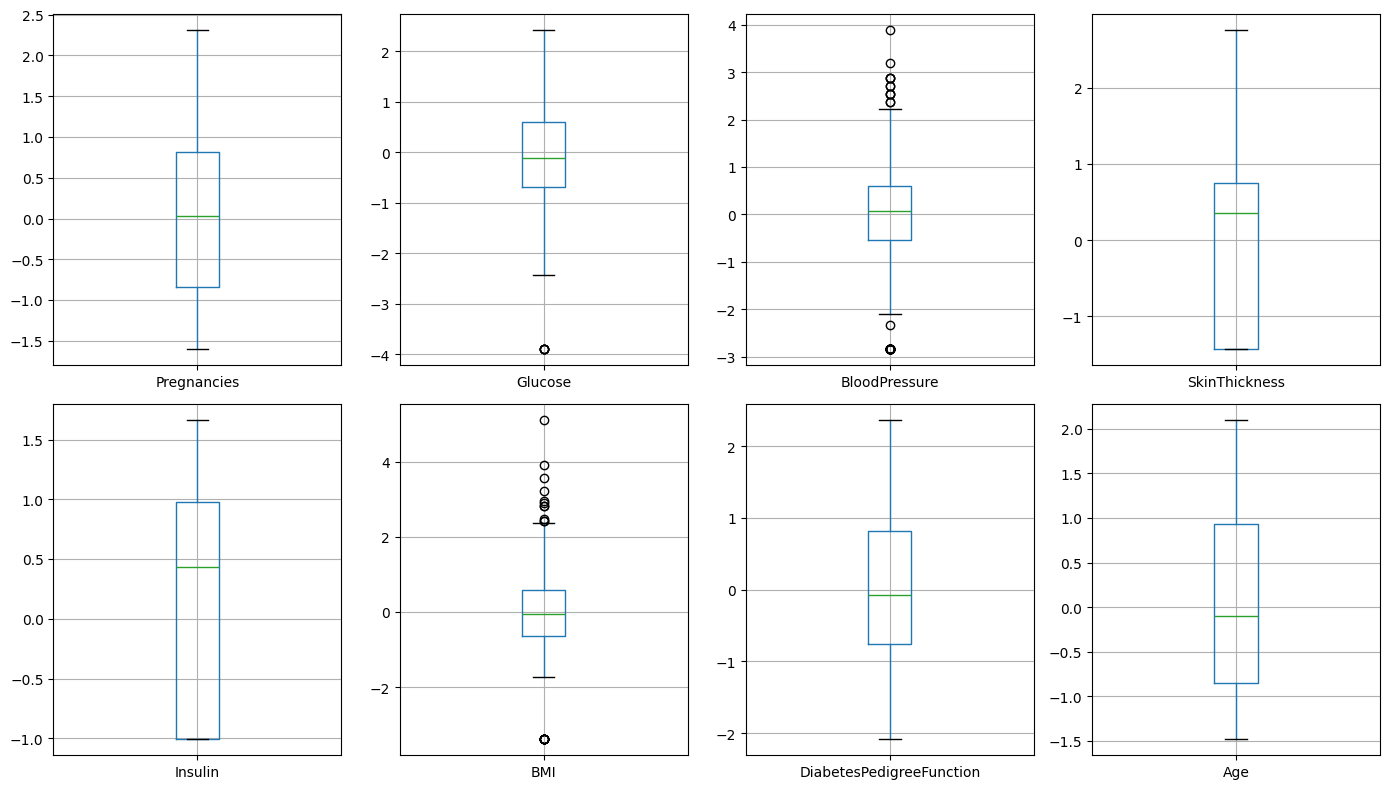

In [14]:
# Checking for distribution/center and skewness after the transformation------------------------------
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))
for i, col in enumerate(transformed_df.columns):
    transformed_df[col].hist(ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(col)
plt.tight_layout()

# Checking for skewness------------------------------
print("\n **********Skewness Check********** \n")
print(transformed_df.apply(lambda x: x.skew()))

# Boxplots------------------------------
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14, 8))
for i, col in enumerate(transformed_df.columns[:]):
    transformed_df.boxplot(column=col, ax=axes[i // 4, i % 4])
plt.tight_layout()
plt.show()

- After transformation, several variables including Glucose, Blood Pressure, BMI, DPF and Age exhibit distributions that approximate normality. This is advantageous for machine learning models that assume normally distributed data.
- Blood Pressure still displays a moderately left-skewed distribution, deviating noticeably from symmetry.
- We continue to observe a few outliers in two of the features: Blood Pressure and BMI. These outliers have the potential to impact the performance of specific algorithms, as they may exert disproportionate influence on the model.

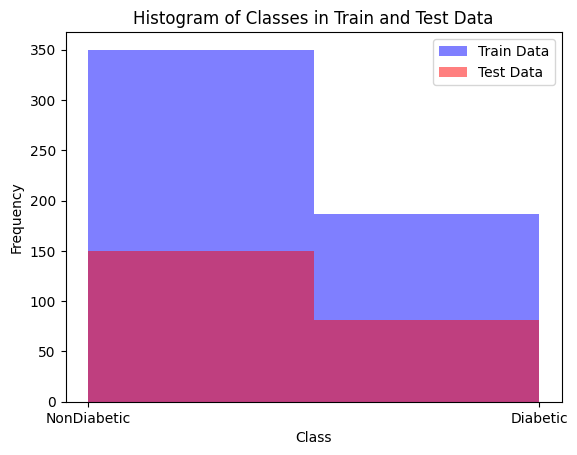

In [15]:
# Training Data------------------------------

# Data Splitting------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    transformed_df, diabetes_data['Outcome'], test_size=0.3, random_state=1, stratify=diabetes_data['Outcome']
)

plt.hist(y_train, bins=2, alpha=0.5, color='b', label='Train Data')
plt.hist(y_test, bins=2, alpha=0.5, color='r', label='Test Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogram of Classes in Train and Test Data')
plt.xticks([0, 1])  # Assuming binary classification with classes 0 and 1
plt.legend(loc='upper right')

original_y_train = y_train.copy()
original_y_test = y_test.copy()

# Convert y_test and y_train to binary format------------------------------
y_train = y_train.map({'NonDiabetic': 0, 'Diabetic': 1})
y_test = y_test.map({'NonDiabetic': 0, 'Diabetic': 1})

# Dictionary to store ROC curve data------------------------------
roc_data = {}
combined_stats = pd.DataFrame()


In [16]:
def ModelStats(model, X, y, model_name, setname, roc_data_dict):
	
        # Predictions on Data------------------------------
        
        if model_name.startswith('Partial'): 
            predictions = model.predict(X)
            probabilities = predictions.ravel()
            predictions = (predictions > 0.5).astype(int)
        elif model_name.startswith('Neural'):
            predictions = (model.predict(X) > 0.5).astype("int32")
            probabilities = model.predict(X)
        else:
            predictions = model.predict(X)
            probabilities = model.predict_proba(X)[:, 1]
        
        print(f"\n **********{model_name}: {setname} Set Results**********")

        # Confusion Matrix------------------------------
        conf_matrix = confusion_matrix(y, predictions)
        conf_matrix_percentage = (conf_matrix / conf_matrix.sum()) * 100
        print(f"\n Confusion Matrix(in%):\n{conf_matrix_percentage.round(0)}")

        # Extracting TN, FP, FN, and TP------------------------------
        TN, FP, FN, TP = conf_matrix_percentage.ravel()

        # Calculating Sensitivity (True Positive Rate)------------------------------
        sensitivity = round(TP / (TP + FN)*100,2)
        #print(f"\n Sensitivity(in%): {sensitivity:.2f}")

        # Calculating Specificity (True Negative Rate)------------------------------
        specificity = round(TN / (TN + FP)*100,2)
        #print(f"\n Specificity(in%): {specificity:.2f}")

        # AUC (Area Under the ROC Curve)------------------------------
        auc_score = round(roc_auc_score(y, probabilities)*100,2)
        #print(f"\n AUC(in%): {auc_score:.2f}")

        # Accuracy------------------------------
        accuracy = round(accuracy_score(y, predictions)*100,2)
        #print(f"\n Accuracy(in%): {accuracy:.2f}")

        # ROC Curve------------------------------
        fpr, tpr, _ = roc_curve(y, probabilities)
        plt.plot(fpr, tpr, label=f'{model_name}')
        plt.title(f'ROC Curve: {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        
        # Save FPR and TPR in the provided dictionary with a unique identifier------------------------------
        roc_id = f"{model_name}_{setname}"
        roc_data_dict[roc_id] = {'fpr': fpr, 'tpr': tpr}
    
        metrics_df = pd.DataFrame({
        'Model Name': [model_name],
        'Set Name': [setname],
        'Sensitivity': [sensitivity],
        'Specificity': [specificity],
        'AUC Score': [auc_score],
        'Accuracy': [accuracy],
        'ROC ID': [roc_id]
        })
        
        return metrics_df



 **********Logistic Model: Training Set Results**********

 Confusion Matrix(in%):
[[57.  8.]
 [15. 20.]]


Model Name  Set Name  Sensitivity  Specificity  AUC Score  Accuracy  \
0  Logistic Model  Training        57.75         88.0      84.51     77.47   

                    ROC ID  
0  Logistic Model_Training

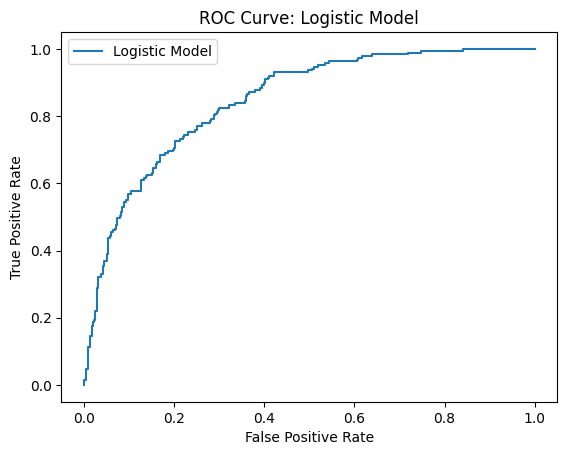

In [17]:
# Logistic Regression Model------------------------------
logistic_model = LogisticRegressionCV(
    cv=5, scoring='roc_auc', max_iter=12
)
logistic_model.fit(X_train, y_train)

logistic_stat = ModelStats(logistic_model, X_train, y_train, 'Logistic Model', 'Training', roc_data)
combined_stats = pd.concat([combined_stats, logistic_stat]).reset_index(drop=True).drop_duplicates(subset=['Model Name', 'Set Name'])
logistic_stat


 **********Linear Discriminant Analysis Model: Training Set Results**********

 Confusion Matrix(in%):
[[58.  7.]
 [15. 20.]]


Model Name  Set Name  Sensitivity  Specificity  \
0  Linear Discriminant Analysis Model  Training        57.75        88.86   

   AUC Score  Accuracy                                       ROC ID  
0      84.53     78.03  Linear Discriminant Analysis Model_Training

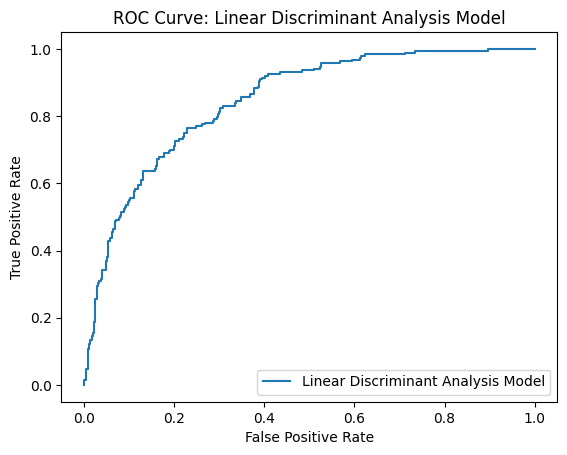

In [18]:
# Linear Discriminant Analysis Model------------------------------
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

lda_stat = ModelStats(lda_model, X_train, y_train, 'Linear Discriminant Analysis Model', 'Training', roc_data)
combined_stats = pd.concat([combined_stats, lda_stat]).reset_index(drop=True).drop_duplicates(subset=['Model Name', 'Set Name'])
lda_stat


 **********Partial Least Squares Discriminant Analysis Model: Training Set Results**********

 Confusion Matrix(in%):
[[58.  7.]
 [15. 20.]]


Model Name  Set Name  Sensitivity  \
0  Partial Least Squares Discriminant Analysis Model  Training        56.68   

   Specificity  AUC Score  Accuracy  \
0        89.43      84.57     78.03   

                                              ROC ID  
0  Partial Least Squares Discriminant Analysis Mo...

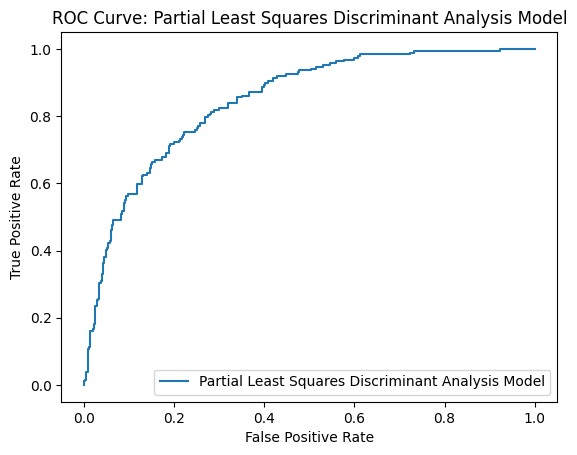

In [19]:
#Partial Least Squares Discriminant Analysis Model------------------------------

# Number of PLS components to use: n_components 
# will need to choose an appropriate number of components
plsda_model = PLSRegression(n_components=3) #n_components optimized by comparing training set metrics
plsda_model.fit(X_train, y_train.to_numpy())

plsda_stat = ModelStats(plsda_model, X_train, y_train, 'Partial Least Squares Discriminant Analysis Model', 'Training', roc_data)
combined_stats = pd.concat([combined_stats, plsda_stat]).reset_index(drop=True).drop_duplicates(subset=['Model Name', 'Set Name'])
plsda_stat

In [20]:
#Penalized Generalized Linear Model------------------------------
grid_search = GridSearchCV(LogisticRegression(penalty='l2'), {'C': [0.001, 0.01, 0.1, 1, 10, 100]}, cv=5, scoring='roc_auc') # Adjust scoring method as needed

# Fit the efficient grid search model to the data
grid_search.fit(X_train, y_train)

# Best parameter and score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters:  {'C': 1}
Best cross-validation score:  0.8345945945945946



 **********Penalized Generalized Linear Model: Training Set Results**********

 Confusion Matrix(in%):
[[58.  8.]
 [15. 20.]]


Model Name  Set Name  Sensitivity  Specificity  \
0  Penalized Generalized Linear Model  Training        57.75        88.29   

   AUC Score  Accuracy                                       ROC ID  
0       84.5     77.65  Penalized Generalized Linear Model_Training

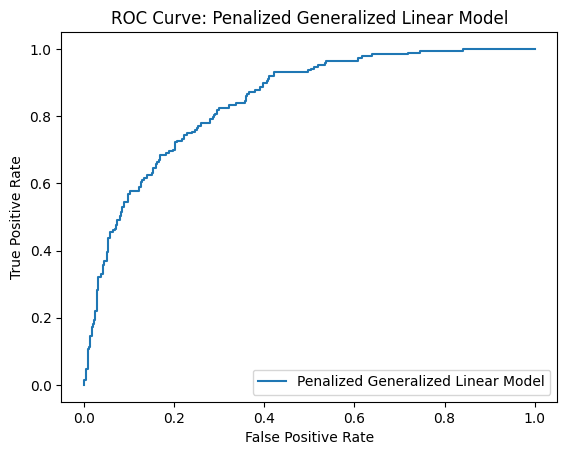

In [21]:
#continued------------------------------
glm_model = LogisticRegression(penalty='l2', C=1.0)
glm_model.fit(X_train, y_train)

glm_stat = ModelStats(glm_model, X_train, y_train, 'Penalized Generalized Linear Model', 'Training', roc_data)
combined_stats = pd.concat([combined_stats, glm_stat]).reset_index(drop=True).drop_duplicates(subset=['Model Name', 'Set Name'])
glm_stat

In [22]:
# Neural Network Model------------------------------

# Define a model-building function for Keras Tuner------------------------------
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu',
                    input_shape=(X_train.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.7, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model with the chosen optimizer and learning rate------------------------------
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd']),
        loss='binary_crossentropy',
        metrics=['accuracy', AUC()]
    )
    return model

# Instantiate the Hyperband tuner------------------------------
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=30,
    directory='hyperband',
    project_name='nn_optimization'
)

# Start the hyperparameter tuning process------------------------------
tuner.search(
    X_train, y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)]
)

# Retrieve the best model------------------------------
nn_model = tuner.get_best_models(num_models=1)[0]

# Summary of the best model------------------------------
nn_model.summary()

# Get the optimal hyperparameters------------------------------
nn_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Reloading Tuner from hyperband\nn_optimization\tuner0.json


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 448)               4032      
                                                                 
 dropout (Dropout)           (None, 448)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 449       
                                                                 
Total params: 4481 (17.50 KB)
Trainable params: 4481 (17.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


17/17 [==============================] - 0s 976us/step

 **********Neural Network Model: Training Set Results**********

 Confusion Matrix(in%):
[[58.  7.]
 [15. 20.]]


Model Name  Set Name  Sensitivity  Specificity  AUC Score  \
0  Neural Network Model  Training        56.68        89.14      84.65   

   Accuracy                         ROC ID  
0     77.84  Neural Network Model_Training

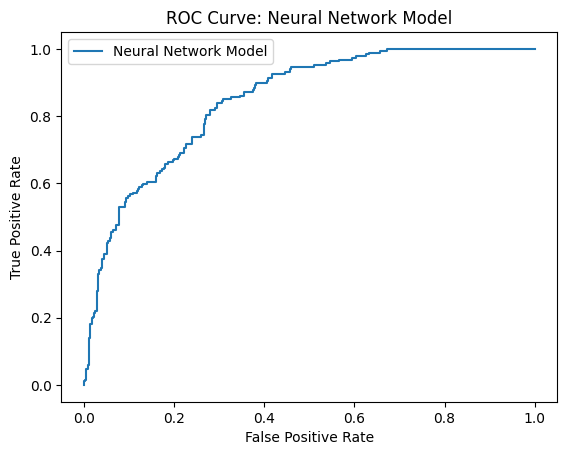

In [23]:
nn_stat = ModelStats(nn_model, X_train, y_train, 'Neural Network Model', 'Training', roc_data)
combined_stats = pd.concat([combined_stats, nn_stat]).reset_index(drop=True).drop_duplicates(subset=['Model Name', 'Set Name'])
nn_stat


 **********Support Vector Machine Model: Training Set Results**********

 Confusion Matrix(in%):
[[59.  6.]
 [11. 24.]]


Model Name  Set Name  Sensitivity  Specificity  \
0  Support Vector Machine Model  Training        68.98        90.86   

   AUC Score  Accuracy                                 ROC ID  
0      90.21     83.24  Support Vector Machine Model_Training

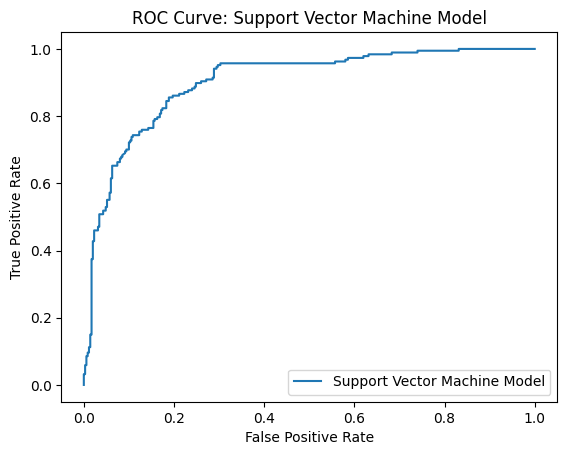

In [24]:
# Support Vector Machine Model------------------------------
svm_model = SVC(probability=True)  # 'probability=True' is needed for roc_auc_score
svm_model.fit(X_train, y_train)

svm_stat = ModelStats(svm_model, X_train, y_train, 'Support Vector Machine Model', 'Training', roc_data)
combined_stats = pd.concat([combined_stats, svm_stat]).reset_index(drop=True).drop_duplicates(subset=['Model Name', 'Set Name'])
svm_stat

Best Parameters: {'n_neighbors': 5}

 **********Knn Model: Training Set Results**********

 Confusion Matrix(in%):
[[58.  7.]
 [10. 25.]]


Model Name  Set Name  Sensitivity  Specificity  AUC Score  Accuracy  \
0  Knn Model  Training        71.66        89.14      90.81     83.05   

               ROC ID  
0  Knn Model_Training

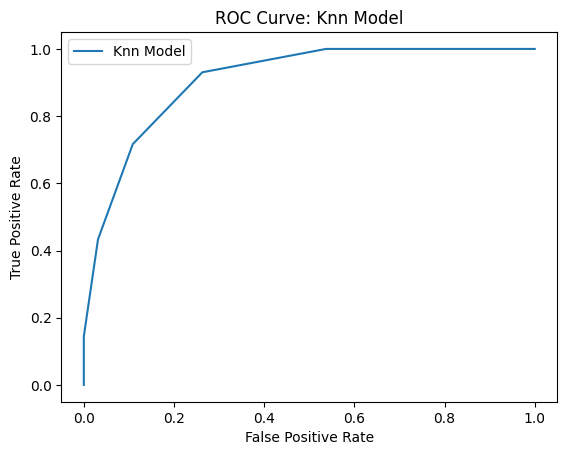

In [25]:
# KNN Model------------------------------

# Define a range of hyperparameters to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # You can adjust the range of neighbors to consider
}
knn_model = KNeighborsClassifier()

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator from the grid search
best_params = grid_search.best_params_
best_knn_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Use the best model for predictions
knn_stat = ModelStats(best_knn_model, X_train, y_train, 'Knn Model', 'Training', roc_data)
combined_stats = pd.concat([combined_stats, knn_stat]).reset_index(drop=True).drop_duplicates(subset=['Model Name', 'Set Name'])
knn_stat


 **********Naive Bayes Model: Training Set Results**********

 Confusion Matrix(in%):
[[54. 11.]
 [13. 21.]]


Model Name  Set Name  Sensitivity  Specificity  AUC Score  Accuracy  \
0  Naive Bayes Model  Training         61.5        82.57      83.62     75.23   

                       ROC ID  
0  Naive Bayes Model_Training

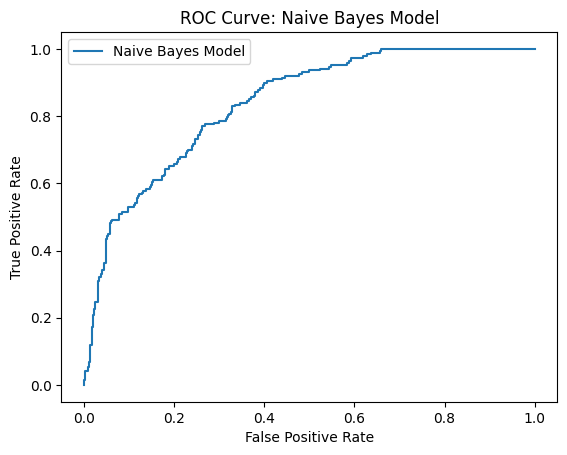

In [26]:
# Naive Bayes Model------------------------------
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

nb_stat = ModelStats(nb_model, X_train, y_train, 'Naive Bayes Model', 'Training', roc_data)
combined_stats = pd.concat([combined_stats, nb_stat]).reset_index(drop=True).drop_duplicates(subset=['Model Name', 'Set Name'])
nb_stat

In [27]:
def plot_combined_roc(roc_data, setname):
    fig = go.Figure()

    for roc_id, roc_values in roc_data.items():
        dict_setname = roc_id.split('_')[-1]
        if dict_setname == setname:
            fig.add_trace(go.Scatter(x=roc_values['fpr'], y=roc_values['tpr'], mode='lines', name=roc_id, hovertemplate=f'{roc_id}<extra></extra>'))

    fig.add_shape(type='line', x0=0, y0=0, x1=1, y1=1, line=dict(color='navy', width=2, dash='dash'))
    fig.update_xaxes(range=[0, 1])
    fig.update_yaxes(range=[0, 1.05])
    fig.update_layout(
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        title=f'Receiver Operating Characteristic (ROC) - {setname}',
        legend=dict(x=0.5, y=0.01),
    )

    fig.show()

In [28]:
plot_combined_roc(roc_data, "Training")

In [29]:
combined_stats[combined_stats['Set Name'] == 'Training'].sort_values(by='AUC Score', ascending=False)

Model Name  Set Name  Sensitivity  \
6                                          Knn Model  Training        71.66   
5                       Support Vector Machine Model  Training        68.98   
4                               Neural Network Model  Training        56.68   
2  Partial Least Squares Discriminant Analysis Model  Training        56.68   
1                 Linear Discriminant Analysis Model  Training        57.75   
0                                     Logistic Model  Training        57.75   
3                 Penalized Generalized Linear Model  Training        57.75   
7                                  Naive Bayes Model  Training        61.50   

   Specificity  AUC Score  Accuracy  \
6        89.14      90.81     83.05   
5        90.86      90.21     83.24   
4        89.14      84.65     77.84   
2        89.43      84.57     78.03   
1        88.86      84.53     78.03   
0        88.00      84.51     77.47   
3        88.29      84.50     77.65   
7        82.57      83.62     75.23   

                                              ROC ID  
6                                 Knn Model_Training  
5              Support Vector Machine Model_Training  
4                      Neural Network Model_Training  
2  Partial Least Squares Discriminant Analysis Mo...  
1        Linear Discriminant Analysis Model_Training  
0                            Logistic Model_Training  
3        Penalized Generalized Linear Model_Training  
7                         Naive Bayes Model_Training


 **********Support Vector Machine Model: Testing Set Results**********

 Confusion Matrix(in%):
[[55. 10.]
 [15. 20.]]


Model Name Set Name  Sensitivity  Specificity  AUC Score  \
0  Support Vector Machine Model  Testing        56.79         84.0      82.49   

   Accuracy                                ROC ID  
0     74.46  Support Vector Machine Model_Testing

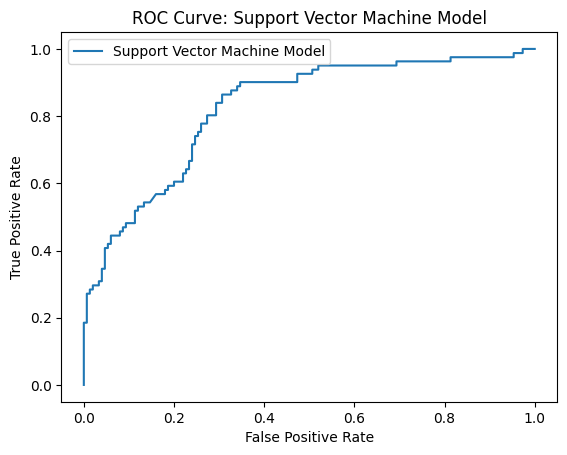

In [30]:
# Support Vector Machine Model - Testing------------------------------
svm_stat2 = ModelStats(svm_model, X_test, y_test, 'Support Vector Machine Model', 'Testing', roc_data)
combined_stats = pd.concat([combined_stats, svm_stat2]).reset_index(drop=True).drop_duplicates(subset=['Model Name', 'Set Name'])
svm_stat2


 **********Knn Model: Testing Set Results**********

 Confusion Matrix(in%):
[[53. 12.]
 [15. 20.]]


Model Name Set Name  Sensitivity  Specificity  AUC Score  Accuracy  \
0  Knn Model  Testing        58.02         82.0      76.27     73.59   

              ROC ID  
0  Knn Model_Testing

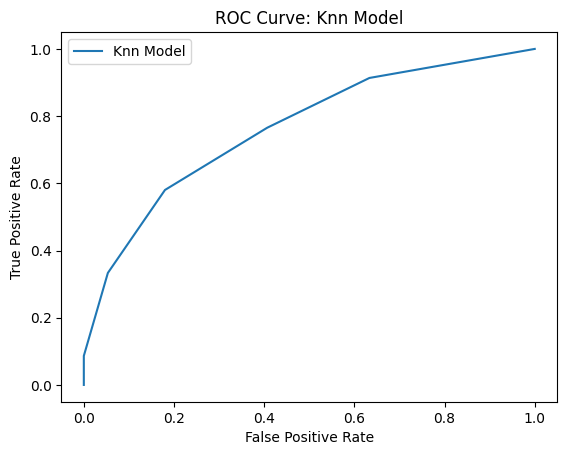

In [31]:
# KNN Model - Testing------------------------------
knn_stat2 = ModelStats(best_knn_model, X_test, y_test, 'Knn Model', 'Testing', roc_data)
combined_stats = pd.concat([combined_stats, knn_stat2]).reset_index(drop=True).drop_duplicates(subset=['Model Name', 'Set Name'])
knn_stat2

In [32]:
plot_combined_roc(roc_data, "Testing")

In [33]:
combined_stats[combined_stats['Set Name'] == 'Testing'].sort_values(by='AUC Score', ascending=False)

Model Name Set Name  Sensitivity  Specificity  AUC Score  \
8  Support Vector Machine Model  Testing        56.79         84.0      82.49   
9                     Knn Model  Testing        58.02         82.0      76.27   

   Accuracy                                ROC ID  
8     74.46  Support Vector Machine Model_Testing  
9     73.59                     Knn Model_Testing